# Размер выборки n = 50

# Пороговые значения для k = 0.0001, для b = 0.001

# Шаг $\varepsilon$ = 0.05, от 0.5 до 1.0

In [23]:
import numpy as np
from src.sensitivity import getsensitivity
from src.people_dataset import PeopleDataset

In [24]:
# Создание объекта класса PeopleDataset
# по умолчанию размер выборки 20, далее естественно выборки будут и других размеров
dataset = PeopleDataset(50)

# Генерация данных
dataset.generate_data()
#dataset.print_data()
#dataset.print_regression_line()
print("coefs are = ", dataset.get_coefficients())

coefs are =  (0.47071911957982204, 0.4182954539836743)


In [25]:
k_sens, b_sens = getsensitivity(dataset.X, dataset.y)

Max delta k: 0.03
Max delta b: 6.30
True k: 0.47
True b: 0.42


In [26]:
# будет определено также отдельным файлом, не в блокноте, пока для удобства
def laplace_mech(dataset, epsilon, k_sens, b_sens):
    k_true, b_true = dataset.get_coefficients()
    k_noise = np.random.laplace(loc = 0, scale = k_sens / epsilon, size = 1)
    b_noise = np.random.laplace(loc = 0, scale = b_sens / epsilon, size = 1)
    return k_true + k_noise, b_true + b_noise

In [27]:
# Истинные коэффициенты
dataset.get_coefficients()

(0.47071911957982204, 0.4182954539836743)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def compare_steps(dataset, k_sens, b_sens, epsilon_start, epsilon_end, epsilon_step, k_threshold, b_threshold):
    epsilon_values = np.arange(epsilon_start, epsilon_end, epsilon_step)
    k_true, b_true = dataset.get_coefficients()
    results = []

    for epsilon in epsilon_values:
        print("epsilon = ", epsilon)
        k_mean = 0
        b_mean = 0
        k_diff = float('inf')
        b_diff = float('inf')
        step_count = 0
        k_means = []
        b_means = []

        while k_diff > k_threshold or b_diff > b_threshold:
            k_tild, b_tild = laplace_mech(dataset, epsilon, k_sens, b_sens)

            k_mean = (k_mean * step_count + k_tild) / (step_count + 1)
            b_mean = (b_mean * step_count + b_tild) / (step_count + 1)

            k_diff = np.abs(k_mean - k_true)
            b_diff = np.abs(b_mean - b_true)

            step_count += 1
            k_means.append(k_mean)
            b_means.append(b_mean)

            if step_count >= 50000: # если за 10к шагов не получили, что хотели, то выходим\
                print("Атака не удалась")
                break

        results.append((epsilon, step_count, k_means, b_means))

    return results



epsilon =  0.5
Атака не удалась
epsilon =  0.55
Атака не удалась
epsilon =  0.6000000000000001
Атака не удалась
epsilon =  0.6500000000000001
Атака не удалась
epsilon =  0.7000000000000002
epsilon =  0.7500000000000002
Атака не удалась
epsilon =  0.8000000000000003
epsilon =  0.8500000000000003
epsilon =  0.9000000000000004
epsilon =  0.9500000000000004
Атака не удалась
epsilon =  1.0000000000000004
Атака не удалась


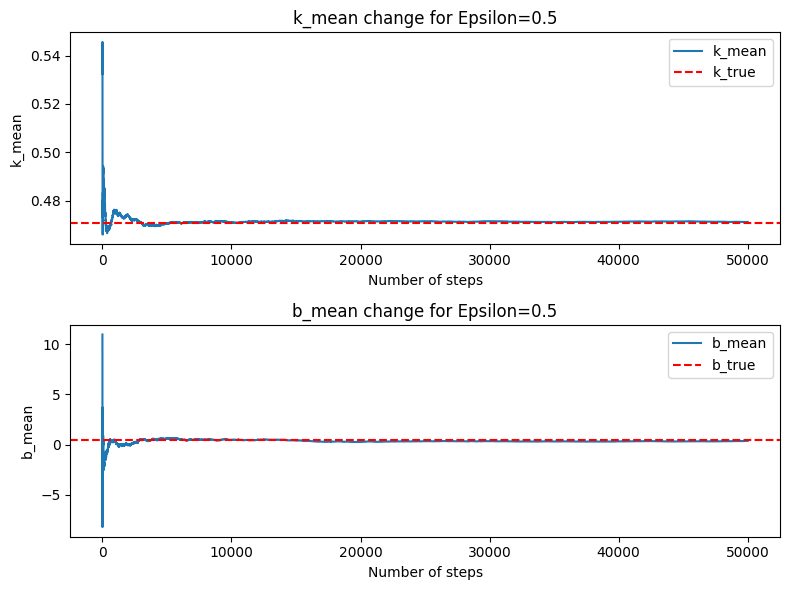

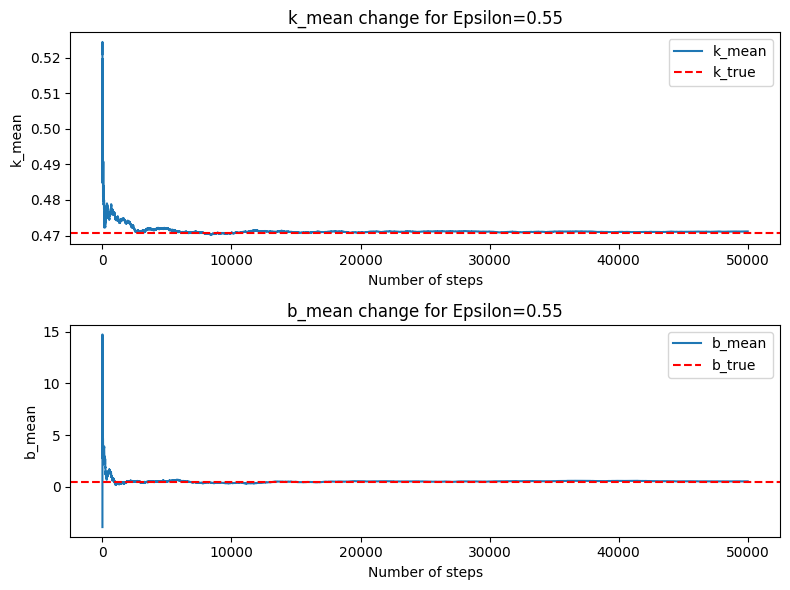

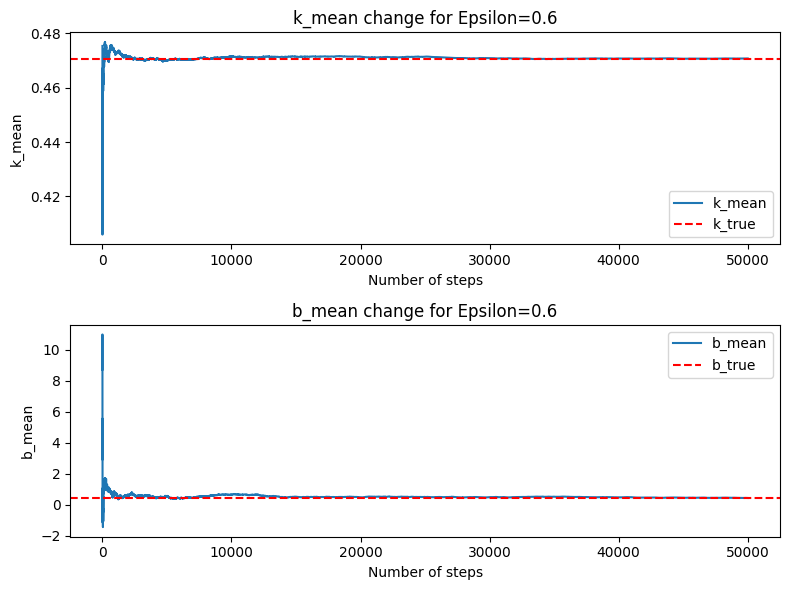

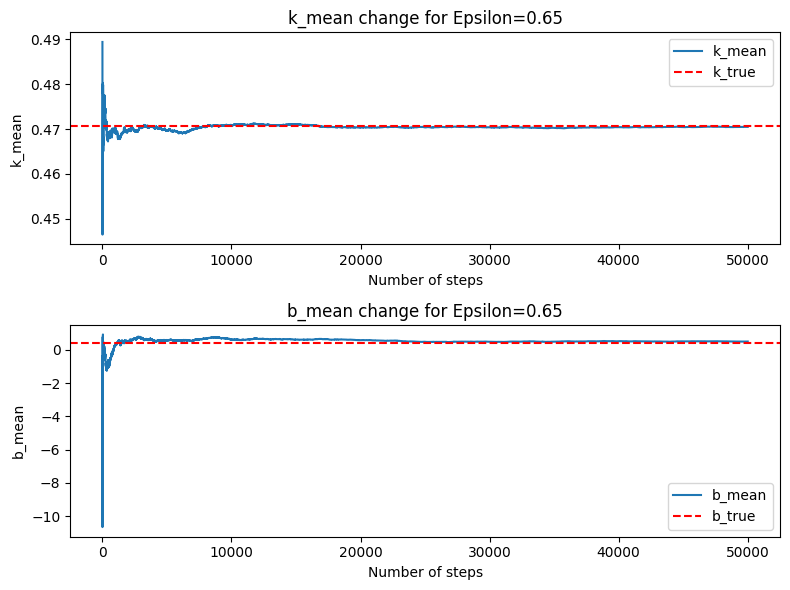

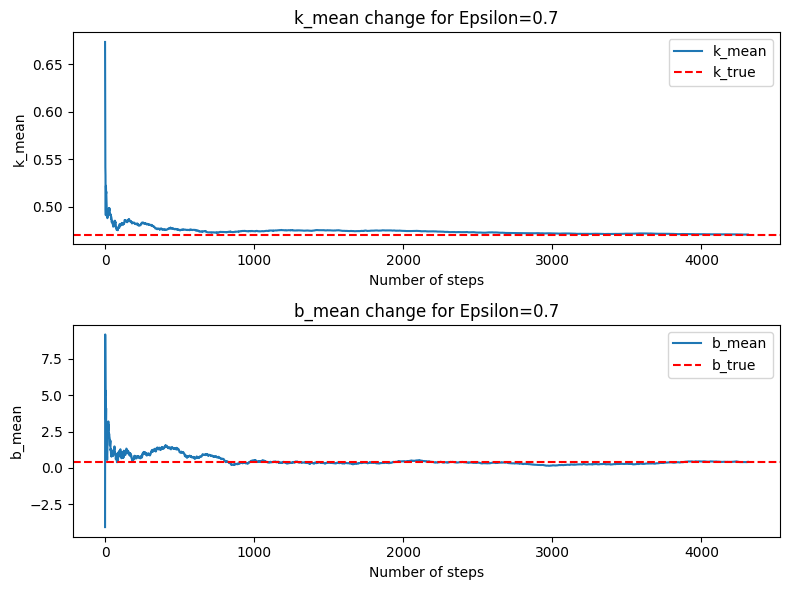

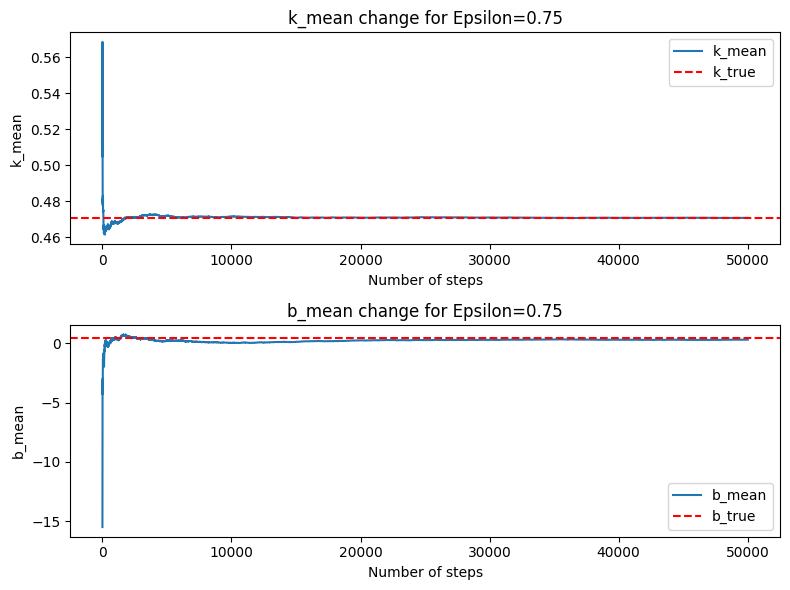

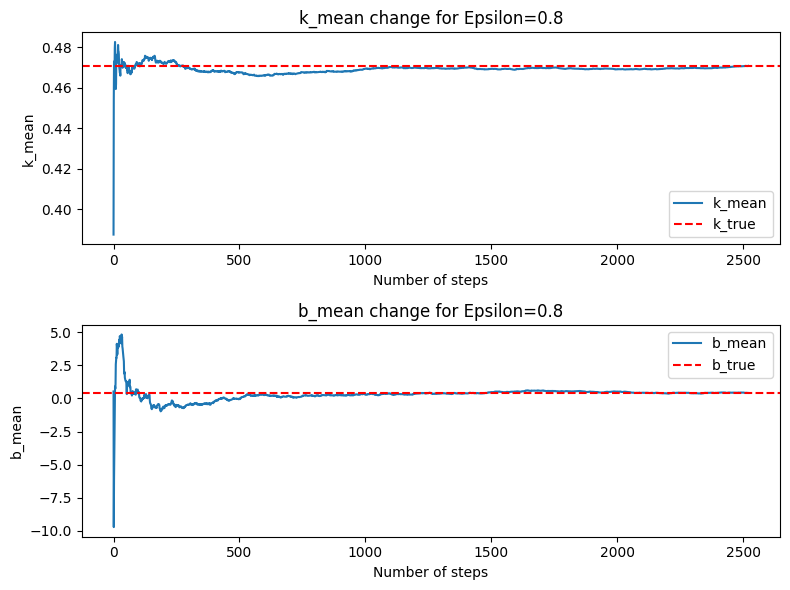

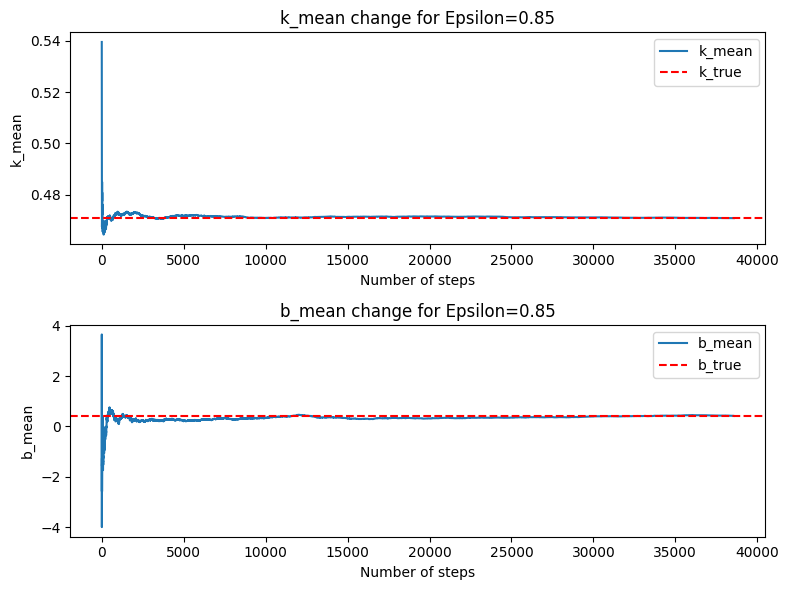

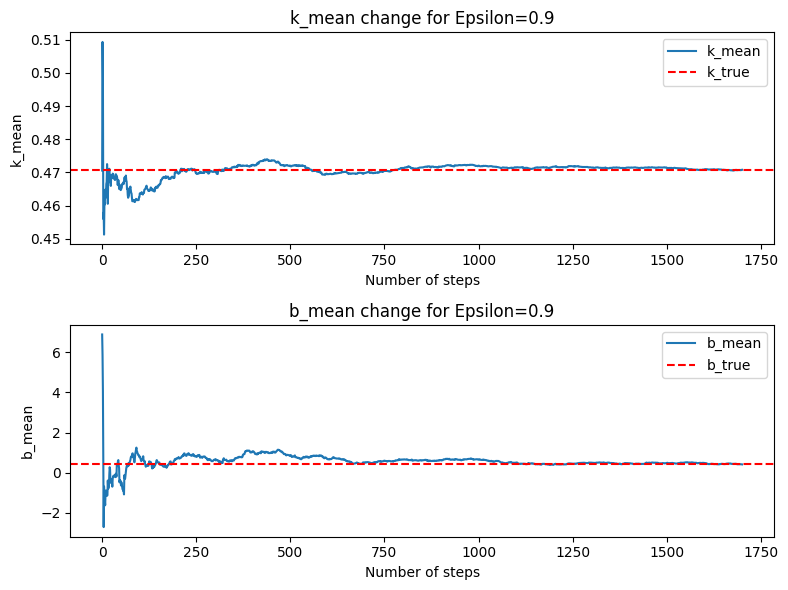

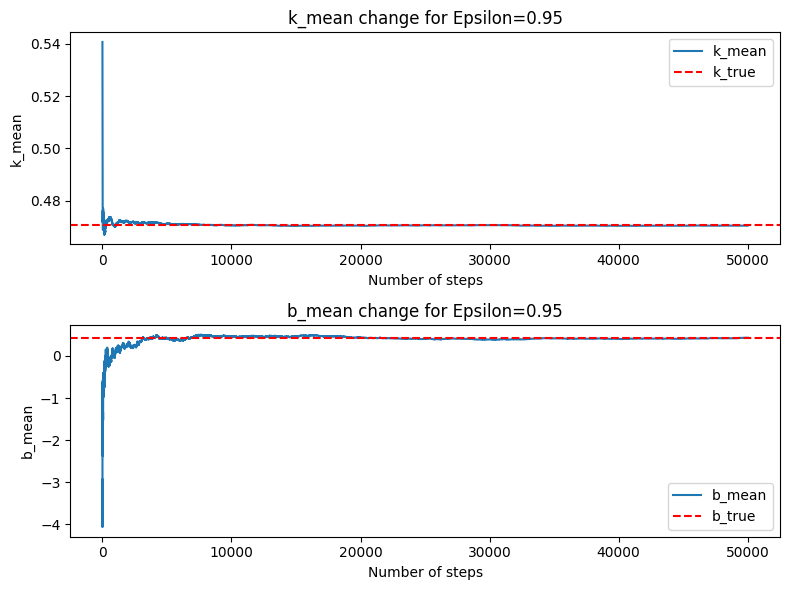

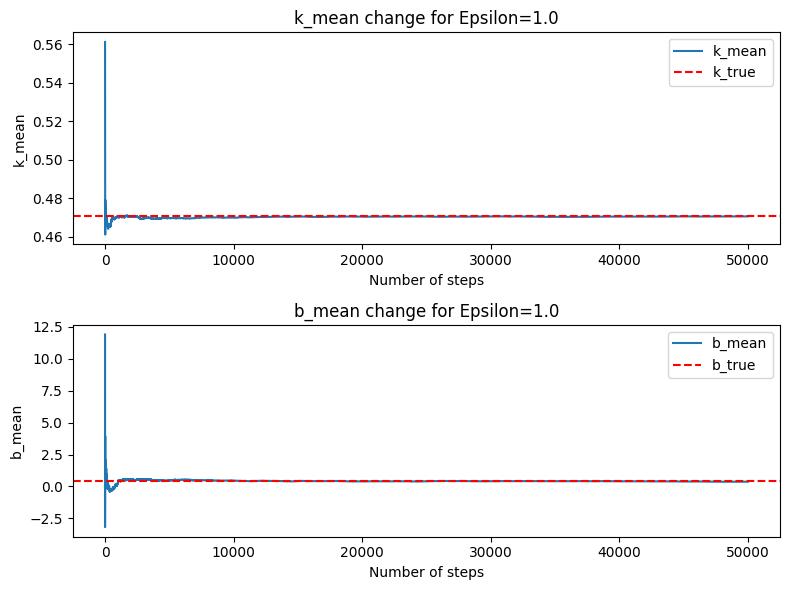

In [29]:
# Использование:
epsilon_start = 0.5
epsilon_end = 1.01
epsilon_step = 0.05
k_threshold = 0.0001
b_threshold = 0.001

results = compare_steps(dataset, k_sens, b_sens, epsilon_start, epsilon_end, epsilon_step, k_threshold, b_threshold)

k_true, b_true = dataset.get_coefficients()

for epsilon, step_count, k_means, b_means in results:
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.plot(range(step_count), k_means, label='k_mean')
    plt.axhline(y=k_true, color='r', linestyle='--', label='k_true')
    plt.xlabel('Number of steps')
    plt.ylabel('k_mean')
    plt.title(f'k_mean change for Epsilon={round(epsilon, 2)}')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(range(step_count), b_means, label='b_mean')
    plt.axhline(y=b_true, color='r', linestyle='--', label='b_true')
    plt.xlabel('Number of steps')
    plt.ylabel('b_mean')
    plt.title(f'b_mean change for Epsilon={round(epsilon, 2)}')
    plt.legend()

    plt.tight_layout()
    plt.show()